In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [2]:
env = BlackjackEnv()

In [6]:
print(env.__dict__)

{'action_space': Discrete(2), 'observation_space': Tuple(Discrete(32), Discrete(11), Discrete(2)), '_np_random': Generator(PCG64) at 0x10F982960, 'natural': False, 'dealer': [np.int64(4), np.int64(10)], 'player': [np.int64(4), np.int64(1)], 'nA': 2}


In [13]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for episode in range(num_episodes):
        o = []
        r = []

        observation = env.reset()
        o.append(observation)
        while True:
            action = policy(observation)
            observation, reward, done, info = env.step(action)
            if done:
                r.append(reward)  # If the episode ends, the latest observation does not matter
                break
            else:
                o.append(observation)
                r.append(reward)

        cur_return = 0
        for i in range(len(r) - 1, -1, -1):
            # An every visit monte-carlo estimation
            cur_return = discount_factor * cur_return + r[i]
            returns_sum[o[i]] += cur_return
            returns_count[o[i]] += 1

    for observation, total_return in returns_sum.items():
        total_cnt = returns_count[observation]
        V[observation] = total_return / total_cnt

    return V    

In [14]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

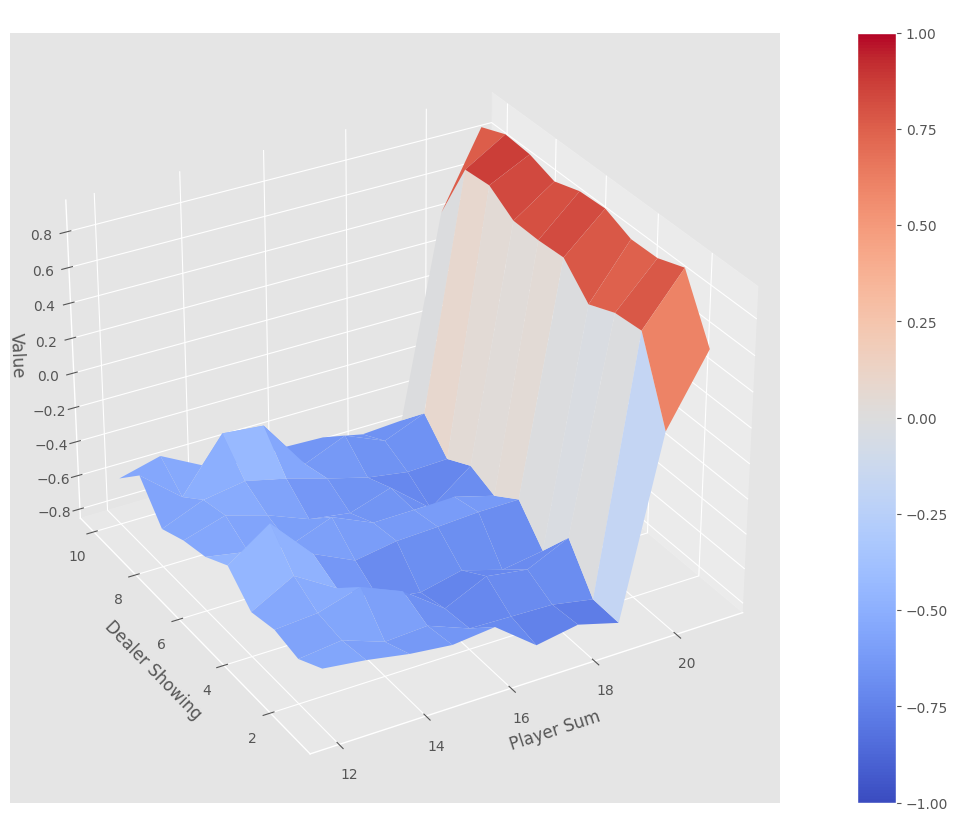

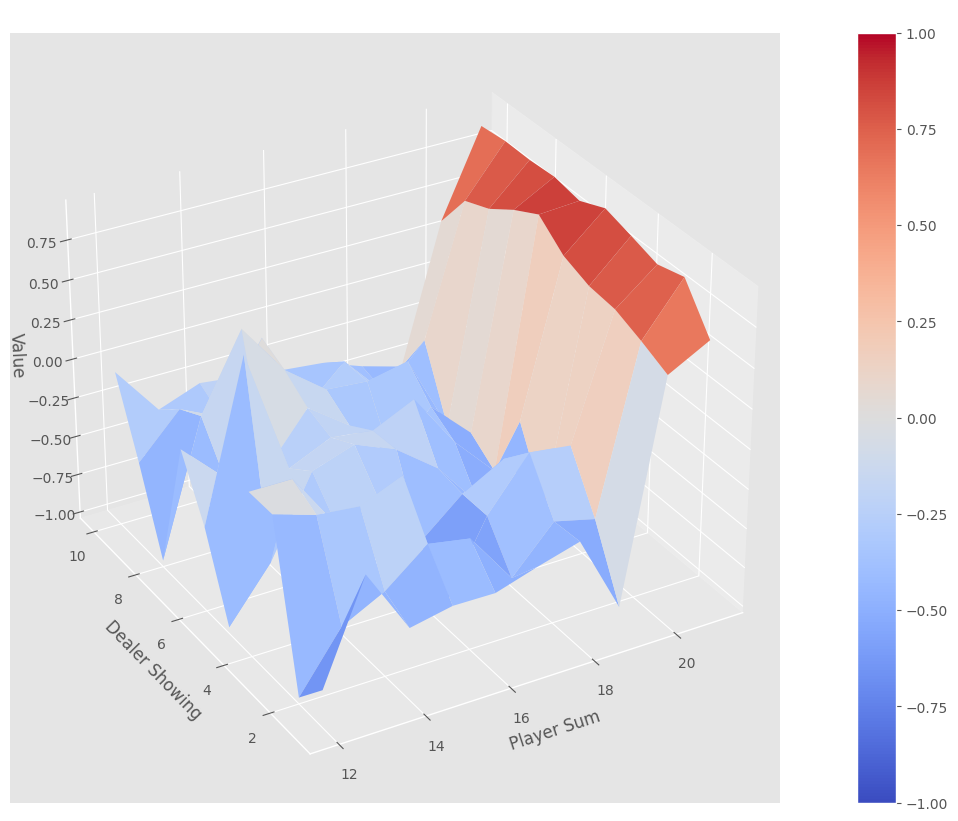

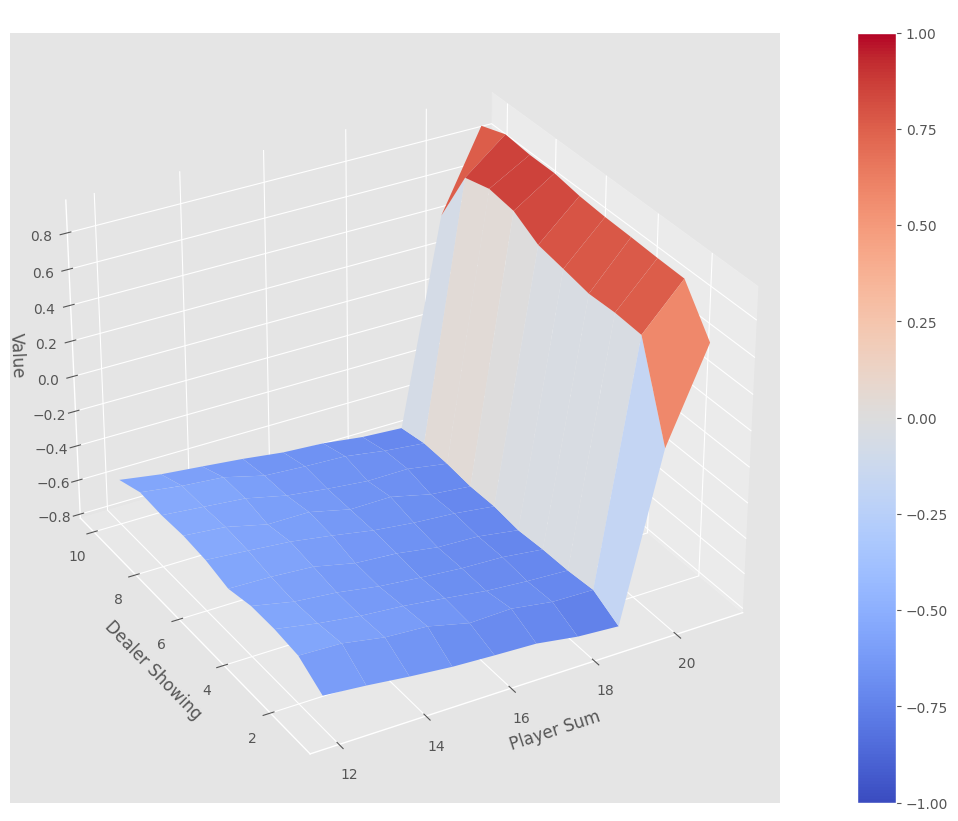

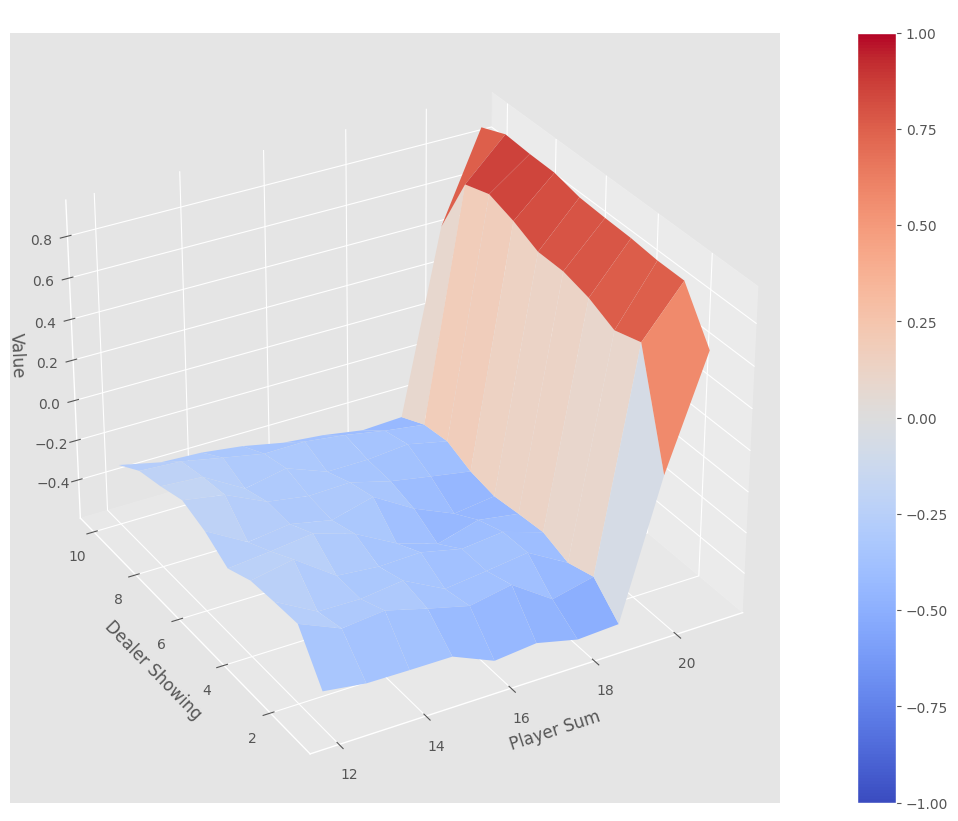

In [15]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")